In [27]:
import pandas as pd
from pathlib import Path

projectPath = Path().cwd().parents[1]
figurePath = projectPath.joinpath("figures")

In [20]:

# check the path
# scores = pd.read_csv('/home/wonseok/projects/2022_DATA_SYNTHESIS/young_age/data/processed/4_results/training_strategy_50_no_bind.csv')

# scores = pd.read_pickle('/home/wonseok/projects/2022_DATA_SYNTHESIS/young_age/data/processed/4_results/extreme_case.pkl')
# scores = scores[scores.type != 'epsilon_0'].copy()

scores = pd.read_csv('/home/wonseok/projects/2022_DATA_SYNTHESIS/young_age/data/processed/4_results/training_strategy_50.csv')

In [21]:
scores

,model,type,epsilon,auroc,f1_score,accuracy,auprc
0,DecisionTree,trtr,0.0,0.710980,0.450000,0.912351,0.242848
1,RandomForest,trtr,0.0,0.778698,0.628571,0.948207,0.429899
2,XGBoost,trtr,0.0,0.770077,0.564103,0.932271,0.350294
3,DecisionTree,tstr,0.0,0.845622,0.457143,0.848606,0.276142
4,RandomForest,tstr,0.0,0.845168,0.526316,0.892430,0.327571
...,...,...,...,...,...,...,...
61,RandomForest,trts,10000.0,0.778698,0.628571,0.948207,0.429899
62,XGBoost,trts,10000.0,0.767922,0.550000,0.928287,0.335131
63,DecisionTree,tsts,10000.0,0.598798,0.307692,0.928287,0.180062
64,RandomForest,tsts,10000.0,0.836093,0.583333,0.920319,0.375637


In [22]:
cond1 = scores['type']=='tstr'
cond2 = scores['model']=='DecisionTree'
cond3 = scores['model']=='RandomForest'
cond4 = scores['model']=='XGBoost'

dt_score = list(scores[cond1&cond2][1:]['auroc'])
rf_score = list(scores[cond1&cond3][1:]['auroc'])
xgb_score = list(scores[cond1&cond4][1:]['auroc'])


#score_by_case.append(list(scores[cond1&cond2]['auroc']))

real_score = list(scores[scores['type']=='trtr']['auroc'])


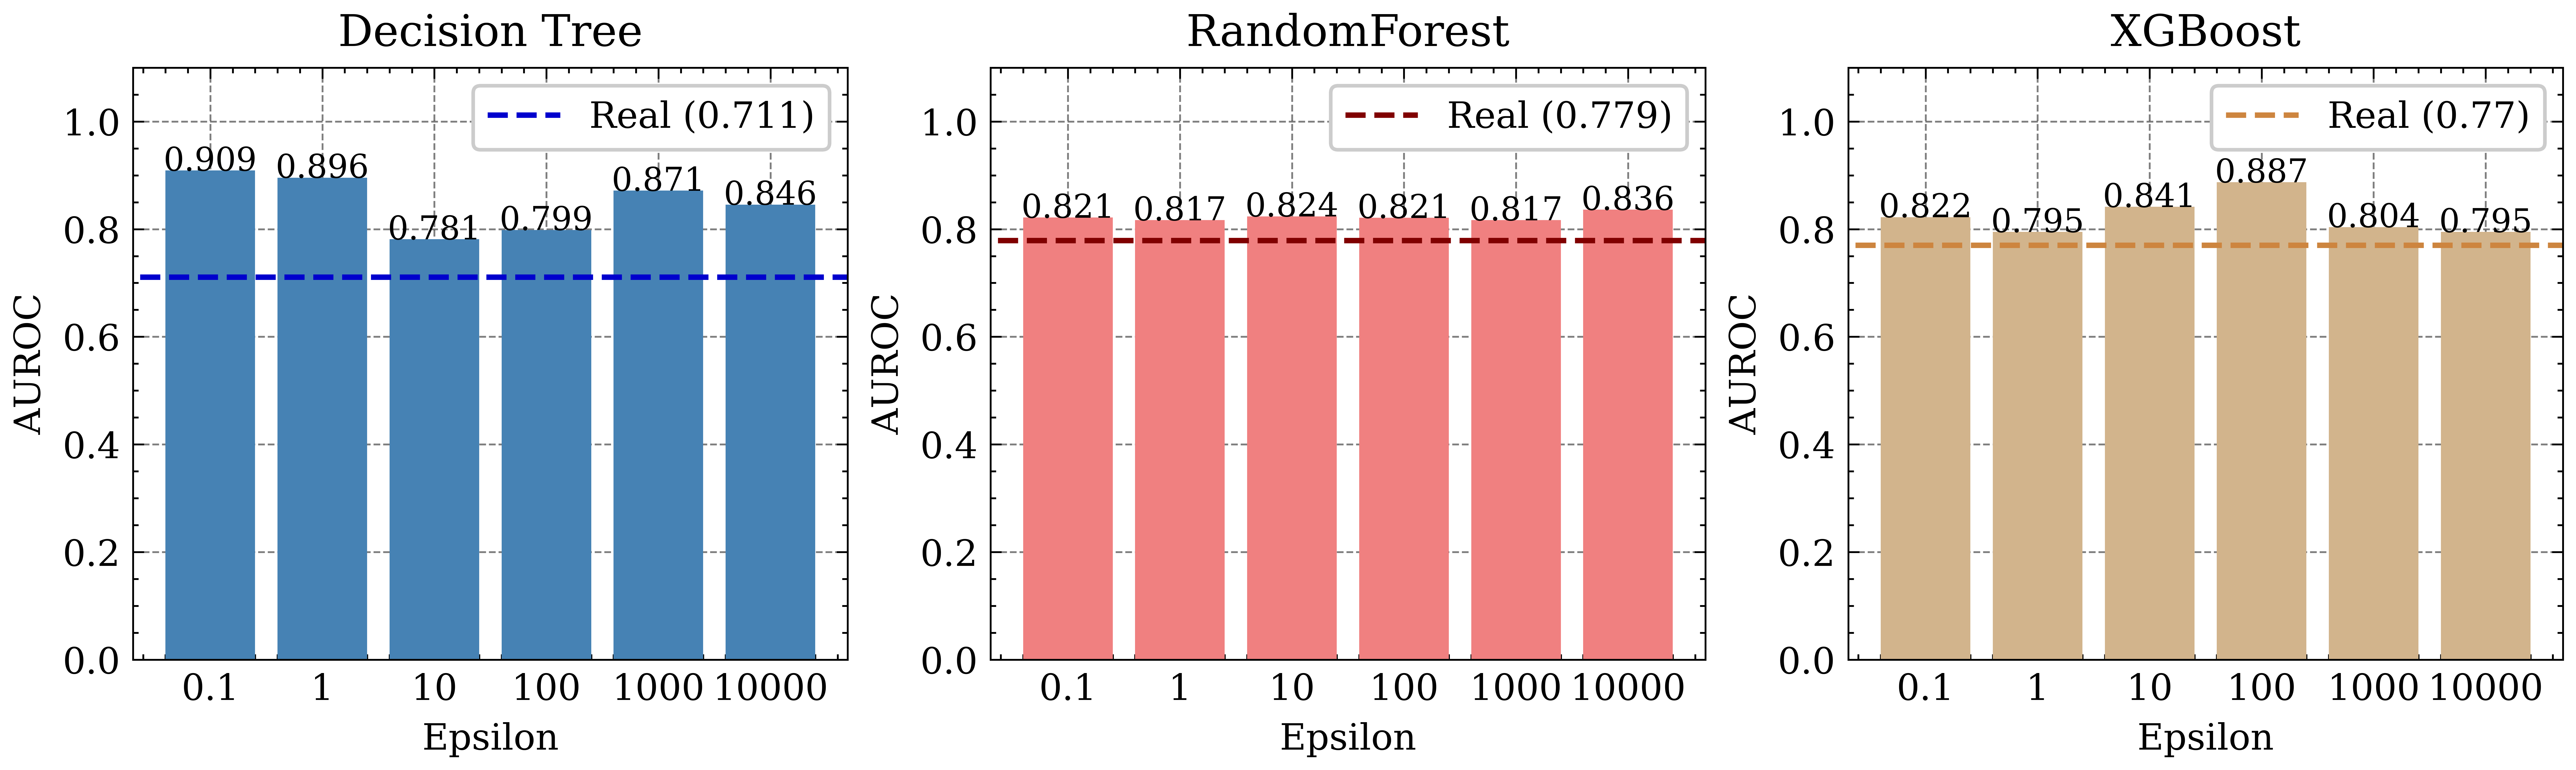

In [28]:
import scienceplots
import matplotlib.pyplot as plt
import numpy as np
    
plt.style.use(['science','grid','no-latex','vibrant'])
plt.figure(figsize=(12,3),dpi=1000)

colors = ['steelblue','lightcoral','tan']



plt.subplot(1,3,1)
plt.bar(np.arange(0, 6, 1),dt_score,color = colors[0])
for i, v in enumerate(dt_score):
    plt.text(i, dt_score[i], str(round(v,3)),ha='center', fontsize=9)
#plt.plot(rf_score,label='RF',color = colors[1])
#plt.plot(xgb_score,label='XGB',color = colors[2])
plt.axhline(real_score[0], 0.01, 1.5, color = 'mediumblue', linestyle='--', linewidth=1.5, 
            label = 'Real ('+str(round(real_score[0],3))+')')
plt.xticks(np.arange(0, 6, 1), labels=['0.1', '1', '10', '100', '1000', '10000'])
plt.ylim(0,1.1)
plt.xlabel('Epsilon')
plt.ylabel('AUROC')
plt.title('Decision Tree')
plt.legend()


plt.subplot(1,3,2)
plt.bar(np.arange(0, 6, 1),rf_score,color = colors[1])
for i, v in enumerate(rf_score):
    plt.text(i, rf_score[i], str(round(v,3)),ha='center', fontsize=9)
#plt.plot(rf_score,label='RF',color = colors[1])
#plt.plot(xgb_score,label='XGB',color = colors[2])
plt.axhline(real_score[1], 0.01, 1.5, color = 'maroon', linestyle='--', linewidth=1.5, 
           label = 'Real ('+str(round(real_score[1],3))+')')
plt.xticks(np.arange(0, 6, 1), labels=['0.1', '1', '10', '100', '1000', '10000'])
plt.ylim(0,1.1)
plt.xlabel('Epsilon')
plt.ylabel('AUROC')
plt.title('RandomForest')
plt.legend()

plt.subplot(1,3,3)
plt.bar(np.arange(0, 6, 1),xgb_score,color = colors[2])
for i, v in enumerate(xgb_score):
    plt.text(i, xgb_score[i], str(round(v,3)),ha='center', fontsize=9)
#plt.plot(rf_score,label='RF',color = colors[1])
#plt.plot(xgb_score,label='XGB',color = colors[2])
plt.axhline(real_score[2], 0.01, 1.5, color = 'peru', linestyle='--', linewidth=1.5,
           label = 'Real ('+str(round(real_score[2],3))+')')
plt.xticks(np.arange(0, 6, 1), labels=['0.1', '1', '10', '100', '1000', '10000'])
plt.ylim(0,1.1)
plt.xlabel('Epsilon')
plt.ylabel('AUROC')
plt.title('XGBoost')
plt.legend()
plt.savefig(figurePath.joinpath("model_performance.png"), dpi=500)
#plt.plot(mlp_score,label='MLP')
